# Analysis of Google Stock Price using RNN and LSTM Model

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from matplotlib import pyplot as plt


Loading Datasets

In [ ]:
df_train=pd .read_csv("Google_Stock_Price_Train.csv")
df_train['Date'] = pd.to_datetime(df_train['Date'])
display(df_train.head())
display(df_train.info())

,Date,Open,High,Low,Close,Volume
0,2012-01-03,325.25,332.83,324.97,663.59,"7,380,500"
1,2012-01-04,331.27,333.87,329.08,666.45,"5,749,400"
2,2012-01-05,329.83,330.75,326.89,657.21,"6,590,300"
3,2012-01-06,328.34,328.77,323.68,648.24,"5,405,900"
4,2012-01-09,322.04,322.29,309.46,620.76,"11,688,800"


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1258 non-null   datetime64[ns]
 1   Open    1258 non-null   float64       
 2   High    1258 non-null   float64       
 3   Low     1258 non-null   float64       
 4   Close   1258 non-null   object        
 5   Volume  1258 non-null   object        
dtypes: datetime64[ns](1), float64(3), object(2)
memory usage: 59.1+ KB


None

In [ ]:
df_test = pd.read_csv("Google_Stock_Price_Test.csv")
df_test['Date'] = pd.to_datetime(df_test['Date'])
display(df_test.head())
display(df_test.info())

,Date,Open,High,Low,Close,Volume
0,2017-01-03,778.81,789.63,775.80,786.14,"1,657,300"
1,2017-01-04,788.36,791.34,783.16,786.90,"1,073,000"
2,2017-01-05,786.08,794.48,785.02,794.02,"1,335,200"
3,2017-01-06,795.26,807.90,792.20,806.15,"1,640,200"
4,2017-01-09,806.40,809.97,802.83,806.65,"1,272,400"


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    20 non-null     datetime64[ns]
 1   Open    20 non-null     float64       
 2   High    20 non-null     float64       
 3   Low     20 non-null     float64       
 4   Close   20 non-null     float64       
 5   Volume  20 non-null     object        
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 1.1+ KB


None

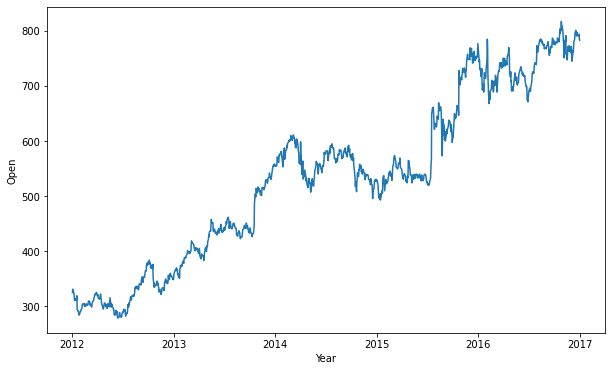

In [ ]:
# Visualizing the Opening price for several years
plt.figure(figsize=(10,6))
plt.plot(df_train["Date"], df_train["Open"])
plt.xlabel("Year")
plt.ylabel("Open")
plt.show()

Preparing the Train data

In [ ]:
# Train data to feed the models
train_set = df_train.loc[:, ["Open"]].values
train_set.shape

(1258, 1)

In [ ]:
# Normailizing the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range = (0,1))
train_data = scaler.fit_transform(train_set) 

In [ ]:
# Separating the data into x_train and y_train
# Timesteps = 50
x_train = [train_data[i-50:i, 0] for i in range(50, len(train_data))]

y_train = [train_data[i, 0] for i in range(50, len(train_data))]

x_train = np.array(x_train)
y_train = np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
display(x_train.shape);
display(y_train.shape);

(1208, 50, 1)

(1208,)

Preparing the Test Data

In [ ]:
actual_val = df_test.loc[:,["Open"]].values
dataset_total = pd.concat((df_train["Open"], df_test["Open"]), axis = 0)

inputs = dataset_total[len(dataset_total) - len(df_test) - 50:].values.reshape(-1,1)

inputs = scaler.transform(inputs)

x_test = [inputs[i - 50:i,0] for i in range(50, 70)]
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
x_test.shape

(20, 50, 1)

## Building RNN Model

In [ ]:
# Initialising the RNN
model_rnn = keras.Sequential()
model_rnn.add(layers.SimpleRNN(units = 50, activation = "tanh", return_sequences = True, input_shape = (x_train.shape[1], 1)))
model_rnn.add(layers.Dropout(0.2))

model_rnn.add(layers.SimpleRNN(units = 50, activation = "tanh", return_sequences = True))
model_rnn.add(layers.Dropout(0.2))

model_rnn.add(layers.SimpleRNN(units = 50, activation = "tanh", return_sequences = True))
model_rnn.add(layers.Dropout(0.2))

model_rnn.add(layers.SimpleRNN(units = 50))
model_rnn.add(layers.Dropout(0.2))

model_rnn.add(layers.Dense(units = 1))

# Model Summary
display(model_rnn.summary())

# Compiling
model_rnn.compile(optimizer = "adam", loss = "MSE",metrics=["MSE"])

# Fitting the RNN
history_rnn = model_rnn.fit(x_train, y_train, epochs = 50, batch_size = 32,validation_split=0.1)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 50, 50)            2600      
                                                                 
 dropout (Dropout)           (None, 50, 50)            0         
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 50, 50)            5050      
                                                                 
 dropout_1 (Dropout)         (None, 50, 50)            0         
                                                                 
 simple_rnn_2 (SimpleRNN)    (None, 50, 50)            5050      
                                                                 
 dropout_2 (Dropout)         (None, 50, 50)            0         
                                                                 
 simple_rnn_3 (SimpleRNN)    (None, 50)                5

None

Epoch 1/50
34/34 [==============================] - 16s 225ms/step - loss: 0.3316 - MSE: 0.3316 - val_loss: 0.0138 - val_MSE: 0.0138
Epoch 2/50
34/34 [==============================] - 5s 153ms/step - loss: 0.2193 - MSE: 0.2193 - val_loss: 0.0307 - val_MSE: 0.0307
Epoch 3/50
34/34 [==============================] - 5s 155ms/step - loss: 0.1559 - MSE: 0.1559 - val_loss: 0.0261 - val_MSE: 0.0261
Epoch 4/50
34/34 [==============================] - 6s 165ms/step - loss: 0.1191 - MSE: 0.1191 - val_loss: 0.0242 - val_MSE: 0.0242
Epoch 5/50
34/34 [==============================] - 5s 153ms/step - loss: 0.0956 - MSE: 0.0956 - val_loss: 0.0697 - val_MSE: 0.0697
Epoch 6/50
34/34 [==============================] - 5s 158ms/step - loss: 0.0839 - MSE: 0.0839 - val_loss: 0.0436 - val_MSE: 0.0436
Epoch 7/50
34/34 [==============================] - 5s 157ms/step - loss: 0.0670 - MSE: 0.0670 - val_loss: 0.0015 - val_MSE: 0.0015
Epoch 8/50
34/34 [==============================] - 5s 159ms/step - loss: 0

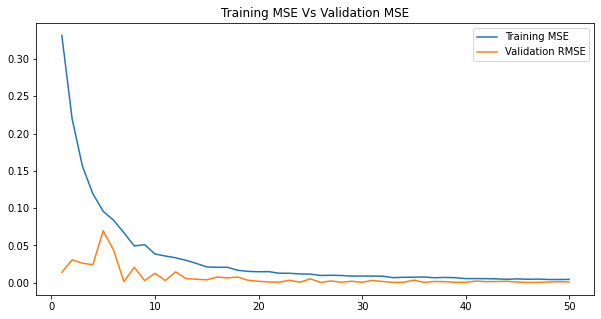

In [ ]:
loss = history_rnn.history['loss']
acc = history_rnn.history['MSE']
val_loss = history_rnn.history['val_loss']
val_acc = history_rnn.history['val_MSE']

epochs = range(1, len(loss)+1)

plt.figure(figsize=(10,5))
plt.plot(epochs, acc, label='Training MSE')
plt.plot(epochs, val_acc, label='Validation RMSE')
plt.title("Training MSE Vs Validation MSE")
plt.legend()
plt.show()

Predicting on Test Data

In [ ]:
predicted_price_rnn = model_rnn.predict(x_test)
predicted_values_rnn = scaler.inverse_transform(predicted_price_rnn)

Visualizing Actual vs Predicted Open price of stocks

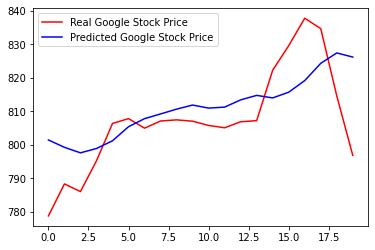

In [ ]:
plt.plot(actual_val, color = "red", label = "Real Google Stock Price")
plt.plot(predicted_values_rnn, color = "blue", label = "Predicted Google Stock Price")
plt.legend()
plt.show()

## Building LSTM Model

In [ ]:
# Building a LSTM Model with 4 Layers
model_lstm = keras.Sequential()
model_lstm.add(layers.LSTM(units = 50, return_sequences = True, input_shape = (x_train.shape[1], 1)))
model_lstm.add(layers.Dropout(0.2))     # Preventing overfitting of data

model_lstm.add(layers.LSTM(units = 50, return_sequences = True))
model_lstm.add(layers.Dropout(0.2))

model_lstm.add(layers.LSTM(units = 50, return_sequences = True))
model_lstm.add(layers.Dropout(0.2))

model_lstm.add(layers.LSTM(units = 50))
model_lstm.add(layers.Dropout(0.2))

model_lstm.add(layers.Dense(units=1,name="OutputLayer"))

display(model_lstm.summary())

# Compiling
opt = tf.keras.optimizers.Adam(learning_rate=0.0001)
model_lstm.compile(loss='MSE',optimizer=opt, metrics=["MSE"])

# Fitting the Model
history_lstm = model_lstm.fit(x_train,y_train, epochs=50,batch_size=32,validation_split=0.1)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50, 50)            10400     
                                                                 
 dropout_4 (Dropout)         (None, 50, 50)            0         
                                                                 
 lstm_1 (LSTM)               (None, 50, 50)            20200     
                                                                 
 dropout_5 (Dropout)         (None, 50, 50)            0         
                                                                 
 lstm_2 (LSTM)               (None, 50, 50)            20200     
                                                                 
 dropout_6 (Dropout)         (None, 50, 50)            0         
                                                                 
 lstm_3 (LSTM)               (None, 50)               

None

Epoch 1/50
34/34 [==============================] - 9s 53ms/step - loss: 0.1432 - MSE: 0.1432 - val_loss: 0.0964 - val_MSE: 0.0964
Epoch 2/50
34/34 [==============================] - 0s 13ms/step - loss: 0.0142 - MSE: 0.0142 - val_loss: 0.0279 - val_MSE: 0.0279
Epoch 3/50
34/34 [==============================] - 0s 13ms/step - loss: 0.0094 - MSE: 0.0094 - val_loss: 0.0126 - val_MSE: 0.0126
Epoch 4/50
34/34 [==============================] - 0s 13ms/step - loss: 0.0073 - MSE: 0.0073 - val_loss: 0.0041 - val_MSE: 0.0041
Epoch 5/50
34/34 [==============================] - 0s 14ms/step - loss: 0.0066 - MSE: 0.0066 - val_loss: 0.0030 - val_MSE: 0.0030
Epoch 6/50
34/34 [==============================] - 0s 14ms/step - loss: 0.0066 - MSE: 0.0066 - val_loss: 0.0028 - val_MSE: 0.0028
Epoch 7/50
34/34 [==============================] - 0s 13ms/step - loss: 0.0061 - MSE: 0.0061 - val_loss: 0.0033 - val_MSE: 0.0033
Epoch 8/50
34/34 [==============================] - 0s 13ms/step - loss: 0.0063 - M

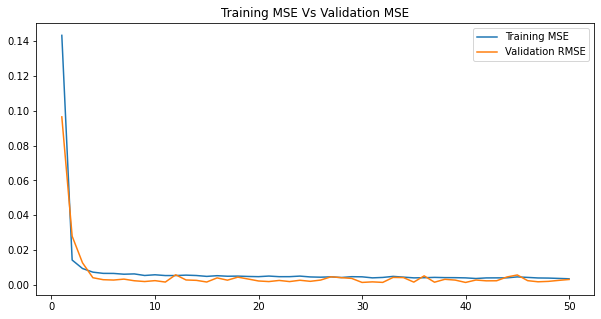

In [ ]:
loss = history_lstm.history['loss']
acc = history_lstm.history['MSE']
val_loss = history_lstm.history['val_loss']
val_acc = history_lstm.history['val_MSE']

epochs = range(1, len(loss)+1)

plt.figure(figsize=(10,5))
plt.plot(epochs, acc, label='Training MSE')
plt.plot(epochs, val_acc, label='Validation RMSE')
plt.title("Training MSE Vs Validation MSE")
plt.legend()
plt.show()

Predicting on Test Data

In [ ]:
predicted_price_lstm = model_lstm.predict(x_test)
predicted_values_lstm = scaler.inverse_transform(predicted_price_lstm)

Visualizing Actual vs Predicted Open price of stocks

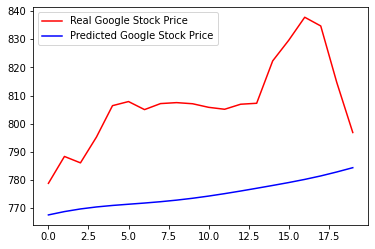

In [ ]:
plt.plot(actual_val, color = "red", label = "Real Google Stock Price")
plt.plot(predicted_values_lstm, color = "blue", label = "Predicted Google Stock Price")
plt.legend()
plt.show()

## Comparing Predictions of RNN, LSTM and Actual Price

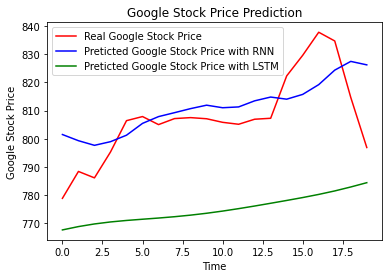

In [ ]:
plt.plot(actual_val,color="red",label="Real Google Stock Price")
plt.plot(predicted_values_rnn,color="blue",label="Preticted Google Stock Price with RNN")
plt.plot(predicted_values_lstm,color="green",label="Preticted Google Stock Price with LSTM")
plt.title("Google Stock Price Prediction")
plt.xlabel("Time")
plt.ylabel("Google Stock Price")
plt.legend()
plt.show()

RNN has lesser MSE, whereas LSTM has Higher MSE. Since 4 hidden layers are used in both cases. LSTM performace is poor compared to RNN.
Simple RNN fits Good to this Dataset